### Phase 2: Conduct EDA and model construction using the master_math.csv file that contains all relevant features and target variable

#### Importing all necessary libraries

In [117]:
import pandas
pandas.__version__
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold, GridSearchCV, learning_curve, cross_val_predict
from sklearn.linear_model import LinearRegression, LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor

from sklearn.pipeline import make_pipeline
import warnings
import xgboost as xgb
import lightgbm as lgb
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
from collections import Counter
#from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#pip install --user scikit-learn

In [3]:
cd /Users/dansa/Documents/GitHub/Phase1/Data/MASTER

C:\Users\dansa\Documents\GitHub\Phase1\Data\MASTER


#### Loading the data and reformatting the school id column

In [4]:
master_math_new = pandas.read_csv("master_math.csv")
master_math_new['NCESSCH'] = master_math_new['NCESSCH'].apply(lambda x: '{0:0>12}'.format(x))
master_math_new.head()

,SCHOOL_YEAR_x,ST_x,NAME,NCESSCH,LEVEL,SCH_TYPE_TEXT_x,SCH_TYPE_x,TITLEI_STATUS,TITLEI_STATUS_TEXT,TEACHERS,...,Total_AP_math_students,Total_students_tookAP,SCH_MATHCLASSES_ALG,SCH_MATHCERT_ALG,Total_Alg1_enroll_students,Total_Alg1_pass_students,Income_Poverty_ratio,IPR_SE,ALL_MTH00NUMVALID_1718,ALL_MTH00PCTPROF_1718_new
0,2017-2018,AL,Albertville High School,010000500871,High,Regular School,1,SWELIGSWPROG,Title I schoolwide school,77.00,...,53.0,286.0,23.0,23.0,450.0,428.0,248.0,80.0,337.0,37.0
1,2017-2018,AL,Asbury High School,010000600872,High,Regular School,1,SWELIGSWPROG,Title I schoolwide school,28.64,...,0.0,46.0,4.0,4.0,63.0,62.0,241.0,127.0,327.0,34.0
2,2017-2018,AL,Douglas High School,010000600878,High,Regular School,1,SWELIGSWPROG,Title I schoolwide school,30.87,...,18.0,244.0,4.0,4.0,117.0,113.0,213.0,51.0,130.0,37.0
3,2017-2018,AL,Kate D Smith DAR High School,010000600883,High,Regular School,1,SWELIGSWPROG,Title I schoolwide school,24.04,...,18.0,205.0,4.0,4.0,105.0,105.0,254.0,48.0,106.0,57.0
4,2017-2018,AL,Brindlee Mountain High School,010000601585,High,Regular School,1,SWELIGSWPROG,Title I schoolwide school,31.26,...,11.0,102.0,4.0,4.0,161.0,149.0,329.0,150.0,338.0,31.0


In [5]:
master_math_new.shape

(13800, 37)

#### Inspecting the data file

In [6]:
master_math_new.columns

Index(['SCHOOL_YEAR_x', 'ST_x', 'NAME', 'NCESSCH', 'LEVEL', 'SCH_TYPE_TEXT_x',
       'SCH_TYPE_x', 'TITLEI_STATUS', 'TITLEI_STATUS_TEXT', 'TEACHERS',
       'FARMS_COUNT', 'Special_ed_schl_new', 'Magnet_schl_new',
       'Charter_Schl_new', 'Alternate_schl_new', 'Total_enroll_students',
       'SCH_FTETEACH_TOT', 'SCH_FTETEACH_CERT', 'SCH_FTETEACH_NOTCERT',
       'FTE_teachers_count', 'SalaryforTeachers', 'Total_SAT_ACT_students',
       'SCH_IBENR_IND_new', 'Total_IB_students', 'SCH_APENR_IND_new',
       'SCH_APCOURSES', 'SCH_APMATHENR_IND_new', 'Total_AP_math_students',
       'Total_students_tookAP', 'SCH_MATHCLASSES_ALG', 'SCH_MATHCERT_ALG',
       'Total_Alg1_enroll_students', 'Total_Alg1_pass_students',
       'Income_Poverty_ratio', 'IPR_SE', 'ALL_MTH00NUMVALID_1718',
       'ALL_MTH00PCTPROF_1718_new'],
      dtype='object')

Create a data frame with only the needed columns for further analysis

In [7]:
math=pd.DataFrame(master_math_new, columns=[ 'NCESSCH', 'SCH_TYPE_x', 
       'TITLEI_STATUS','TEACHERS', 'FARMS_COUNT', 'Total_enroll_students',
       'SCH_FTETEACH_TOT', 'SCH_FTETEACH_CERT', 'SCH_FTETEACH_NOTCERT',
       'FTE_teachers_count', 'SalaryforTeachers', 'Total_SAT_ACT_students',
       'SCH_IBENR_IND_new', 'Total_IB_students', 'SCH_APENR_IND_new',
       'SCH_APCOURSES', 'SCH_APMATHENR_IND_new','Total_AP_math_students',
       'Total_students_tookAP', 'SCH_MATHCLASSES_ALG', 'SCH_MATHCERT_ALG',
       'Total_Alg1_enroll_students', 'Total_Alg1_pass_students',
       'Income_Poverty_ratio','ALL_MTH00PCTPROF_1718_new'])

In [8]:
math.head()

,NCESSCH,SCH_TYPE_x,TITLEI_STATUS,TEACHERS,FARMS_COUNT,Total_enroll_students,SCH_FTETEACH_TOT,SCH_FTETEACH_CERT,SCH_FTETEACH_NOTCERT,FTE_teachers_count,...,SCH_APCOURSES,SCH_APMATHENR_IND_new,Total_AP_math_students,Total_students_tookAP,SCH_MATHCLASSES_ALG,SCH_MATHCERT_ALG,Total_Alg1_enroll_students,Total_Alg1_pass_students,Income_Poverty_ratio,ALL_MTH00PCTPROF_1718_new
0,010000500871,1,SWELIGSWPROG,77.00,832.0,1449.0,78.17,71.17,7.0,72.88,...,8.0,1.0,53.0,286.0,23.0,23.0,450.0,428.0,248.0,37.0
1,010000600872,1,SWELIGSWPROG,28.64,450.0,547.0,32.00,31.00,1.0,32.00,...,3.0,0.0,0.0,46.0,4.0,4.0,63.0,62.0,241.0,34.0
2,010000600878,1,SWELIGSWPROG,30.87,429.0,591.0,36.00,36.00,0.0,36.00,...,6.0,1.0,18.0,244.0,4.0,4.0,117.0,113.0,213.0,37.0
3,010000600883,1,SWELIGSWPROG,24.04,211.0,452.0,29.00,29.00,0.0,29.00,...,6.0,1.0,18.0,205.0,4.0,4.0,105.0,105.0,254.0,57.0
4,010000601585,1,SWELIGSWPROG,31.26,415.0,632.0,37.00,36.00,1.0,37.00,...,5.0,1.0,11.0,102.0,4.0,4.0,161.0,149.0,329.0,31.0


In [9]:
math.rename(columns={'NCESSCH':'School_ID', 'SCH_TYPE_x':'School_type','FARMS_COUNT':'No.FARMS_students',
                       'SCH_FTETEACH_TOT':'FTE_teachcount','SCH_FTETEACH_CERT':'Certified_FTE_teachers','SCH_FTETEACH_NOTCERT':
                       'Noncertified_FTE_teachers','Total_SAT_ACT_students':'Students_participate_SAT_ACT','SCH_IBENR_IND_new':'IB_Indicator',
                       'SCH_APENR_IND_new':'AP_Indicator','SCH_APCOURSES':'No.ofAP_courses_offer','SCH_APMATHENR_IND_new':'Students_enroll_inAPMath?',
                       'SCH_MATHCLASSES_ALG':'No.ofAlg1classes','SCH_MATHCERT_ALG':'Alg1_taught_by_certmathteahcers',
                       'ALL_MTH00PCTPROF_1718_new':'Percent_Math_Proficient'}, inplace=True)

In [10]:
math.describe().T

,count,mean,std,min,25%,50%,75%,max
School_type,13800.0,1.167681e+00,6.793244e-01,1.00,1.0000,1.000,1.000000e+00,4.00
TEACHERS,13800.0,5.053515e+01,4.110120e+01,0.00,19.0275,37.135,7.416250e+01,302.00
No.FARMS_students,13800.0,3.946875e+02,4.423191e+02,0.00,101.0000,228.000,5.280000e+02,4329.00
Total_enroll_students,13800.0,8.483769e+02,7.679972e+02,10.00,259.0000,559.000,1.277000e+03,4996.00
FTE_teachcount,13800.0,5.260862e+01,4.235090e+01,1.10,20.0000,39.000,7.700000e+01,361.00
Certified_FTE_teachers,13800.0,5.125174e+01,4.167501e+01,0.00,19.5000,37.900,7.500000e+01,361.00
Noncertified_FTE_teachers,13800.0,1.355788e+00,4.534651e+00,0.00,0.0000,0.000,1.000000e+00,157.00
FTE_teachers_count,13800.0,5.401679e+01,6.757459e+02,0.10,18.5975,35.800,7.040000e+01,79297.76
SalaryforTeachers,13800.0,3.009350e+06,2.859838e+06,50.39,978955.2425,1997079.520,4.302380e+06,29732778.00
Students_participate_SAT_ACT,13800.0,2.072055e+02,2.368639e+02,1.00,43.0000,117.000,2.910000e+02,2788.00


In [11]:
counts = math['IB_Indicator'].value_counts().to_dict()
print (counts)

{0.0: 13072, 1.0: 727, -6.0: 1}


In [12]:
math=math[math['IB_Indicator']!=-6]

In [13]:
counts = math['IB_Indicator'].value_counts().to_dict()
print (counts)

{0.0: 13072, 1.0: 727}


In [14]:
print(math.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13799 entries, 0 to 13799
Data columns (total 25 columns):
School_ID                          13799 non-null object
School_type                        13799 non-null int64
TITLEI_STATUS                      13799 non-null object
TEACHERS                           13799 non-null float64
No.FARMS_students                  13799 non-null float64
Total_enroll_students              13799 non-null float64
FTE_teachcount                     13799 non-null float64
Certified_FTE_teachers             13799 non-null float64
Noncertified_FTE_teachers          13799 non-null float64
FTE_teachers_count                 13799 non-null float64
SalaryforTeachers                  13799 non-null float64
Students_participate_SAT_ACT       13799 non-null float64
IB_Indicator                       13799 non-null float64
Total_IB_students                  13799 non-null float64
AP_Indicator                       13799 non-null float64
No.ofAP_courses_offer    

We have 13,799 entries and no null values in any column. There are 25 columns, but we can drop the school_id and we'll want to split off the Percent_Math_Proficient.
The object type features should be strings.

Let's take a quick look at some of the data.

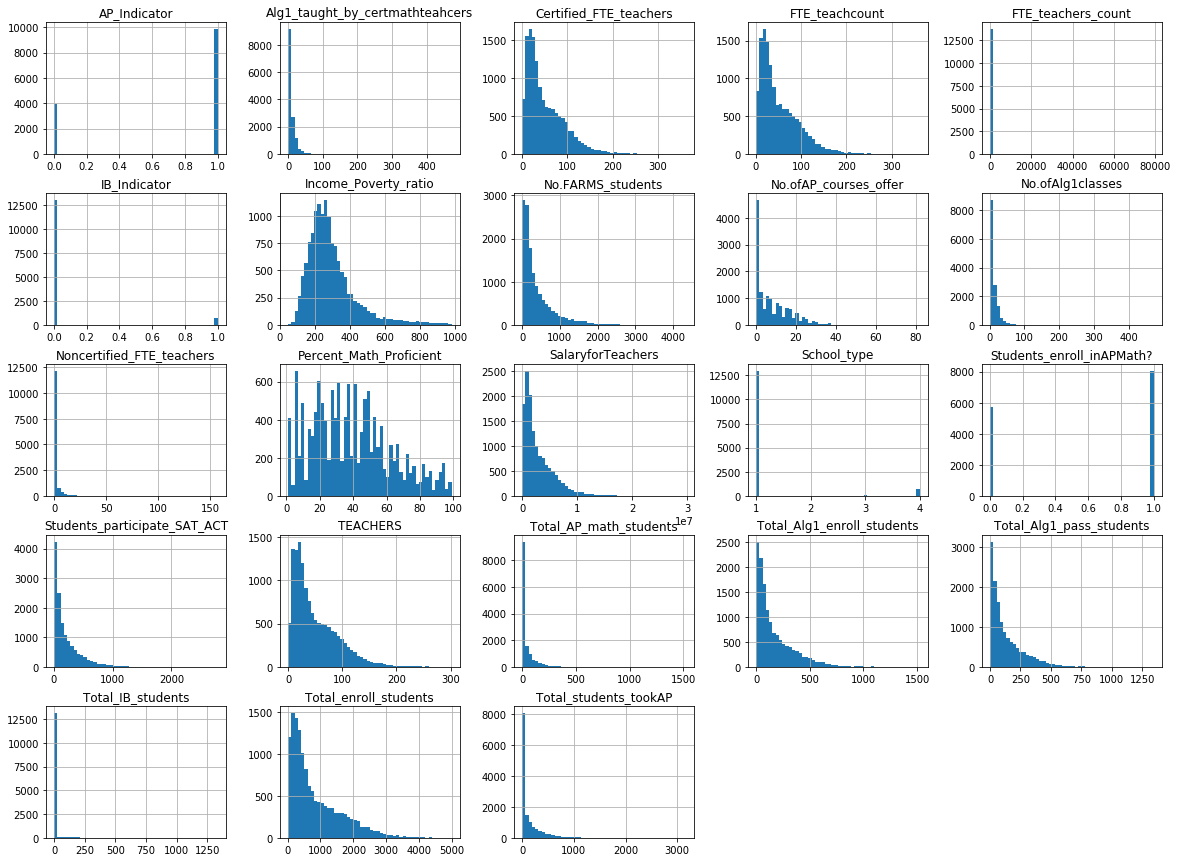

In [15]:
math.hist(bins=50, figsize=(20,15))
plt.show()

We can see that some features have most of their instances at or near zero and relatively few instances at higher values, in some cases much higher. Other features cluster close to zero and have long tails. We also see the percent_math_proficient is almost normally distributed.

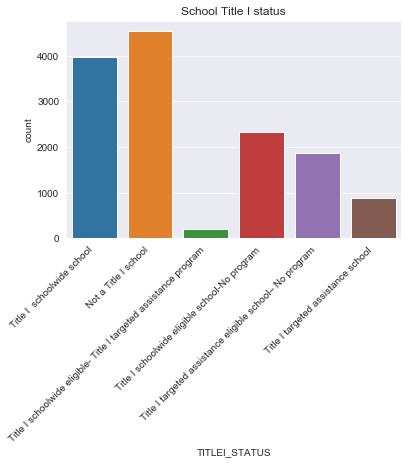

In [16]:
sns.set_style('darkgrid')
_plt = sns.countplot(x='TITLEI_STATUS', data=math)
_plt.set_title('School Title I status')
_plt.set_xticklabels(['Title I  schoolwide school','Not a Title I school','Title I schoolwide eligible- Title I targeted assistance program','Title I schoolwide eligible school-No program','Title I targeted assistance eligible school– No program','Title I targeted assistance school'])
_plt.set_xticklabels(_plt.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.savefig('/Users/dansa/Documents/Title1_M_dist.png', dpi=300, bbox_inches='tight')
plt.show()

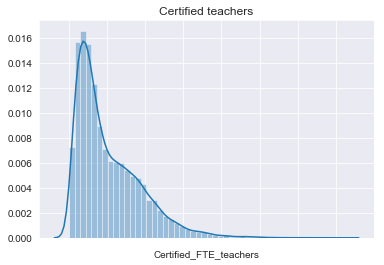

In [17]:
sns.set_style('darkgrid')
cert=math['Certified_FTE_teachers']
_plt = sns.distplot(cert)
_plt.set_title('Certified teachers')
_plt.set_xticklabels(_plt.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.savefig('/Users/dansa/Documents/Certified_FTE_teachers_M_dist.png', dpi=300, bbox_inches='tight')
plt.show()


 mu = 38.69 and sigma = 23.67



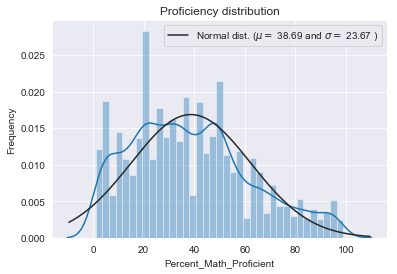

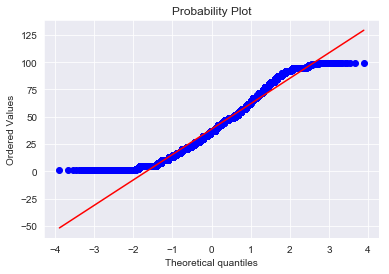

Skewness: 0.490791
Kurtosis: -0.414173


In [18]:
# Plot Histogram
sns.distplot(math['Percent_Math_Proficient'] , fit=norm);
# weights = np.ones_like(np.array(math['Percent_Math_Proficient']))/float(len(np.array(math['Percent_Math_Proficient'])))
# plt.hist(math['Percent_Math_Proficient'], weights=weights, bins = 100)

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(math['Percent_Math_Proficient'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Proficiency distribution')

fig = plt.figure()
res = stats.probplot(math['Percent_Math_Proficient'], plot=plt)
plt.show()

print("Skewness: %f" % math['Percent_Math_Proficient'].skew())
print("Kurtosis: %f" % math['Percent_Math_Proficient'].kurt())

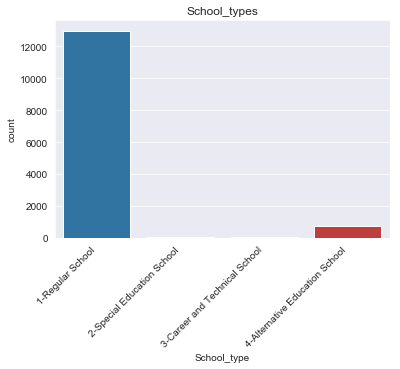

In [19]:
sns.set_style('darkgrid')
Type_plt = sns.countplot(x='School_type', data=math)
Type_plt.set_title('School_types')
Type_plt.set_xticklabels(Type_plt.get_xticklabels(), rotation=45, horizontalalignment='right')
Type_plt.set_xticklabels(["1-Regular School", "2-Special Education School", "3-Career and Technical School", "4-Alternative Education School"])
plt.savefig('/Users/dansa/Documents/Type_M_dist.png', dpi=300, bbox_inches='tight')
plt.show()

In [20]:
math['Pct_certified_teachers']=(math['Certified_FTE_teachers']/math['FTE_teachcount']*100) # lets find the percent of certified teachers

In [21]:
math['Pct_noncertified_teachers']=(math['Noncertified_FTE_teachers']/math['FTE_teachcount']*100) # lets find the percent of noncertified teachers

In [22]:
math['Salary_perFTE_teacher'] = math['SalaryforTeachers']/math['FTE_teachers_count'] # Lets find the salary per FTE in each school

In [23]:
math['IPR_estimate'] = math['Income_Poverty_ratio'] #Income poverty ratio is reported as a percent 

In [24]:
#math['Percent_Reading_Proficient'] = math['Percent_Reading_Proficient']/100

In [25]:
math_clean=math.drop(['School_ID','Certified_FTE_teachers', 'Noncertified_FTE_teachers','FTE_teachcount','FTE_teachers_count','SalaryforTeachers','Income_Poverty_ratio' ], axis=1)

In [129]:
math_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13799 entries, 0 to 13799
Data columns (total 22 columns):
School_type                        13799 non-null float64
TITLEI_STATUS                      13799 non-null object
TEACHERS                           13799 non-null float64
No.FARMS_students                  13799 non-null float64
Total_enroll_students              13799 non-null float64
Students_participate_SAT_ACT       13799 non-null float64
IB_Indicator                       13799 non-null float64
Total_IB_students                  13799 non-null float64
AP_Indicator                       13799 non-null float64
No.ofAP_courses_offer              13799 non-null float64
Students_enroll_inAPMath?          13799 non-null float64
Total_AP_math_students             13799 non-null float64
Total_students_tookAP              13799 non-null float64
No.ofAlg1classes                   13799 non-null float64
Alg1_taught_by_certmathteahcers    13799 non-null float64
Total_Alg1_enroll_stud

In [128]:
math_clean['School_type'] = math_clean['School_type'].astype(float)

In [130]:
math_clean.describe()

,School_type,TEACHERS,No.FARMS_students,Total_enroll_students,Students_participate_SAT_ACT,IB_Indicator,Total_IB_students,AP_Indicator,No.ofAP_courses_offer,Students_enroll_inAPMath?,...,Total_students_tookAP,No.ofAlg1classes,Alg1_taught_by_certmathteahcers,Total_Alg1_enroll_students,Total_Alg1_pass_students,Pct_certified_teachers,Pct_noncertified_teachers,Salary_perFTE_teacher,IPR_estimate,Percent_Math_Proficient
count,13799.000000,13799.000000,13799.000000,13799.000000,13799.000000,13799.000000,13799.000000,13799.000000,13799.000000,13799.000000,...,13799.000000,13799.000000,13799.000000,13799.000000,13799.000000,13799.000000,13799.000000,13799.000000,13799.000000,13799.000000
mean,1.167693,50.533814,394.697079,848.368867,207.202478,0.052685,9.991304,0.716429,7.879049,0.584753,...,129.031234,11.168418,9.401841,171.423944,132.788246,97.275281,2.724174,59430.974554,294.692297,38.687079
std,0.679348,41.102386,442.333664,768.024489,236.872239,0.223412,63.727740,0.450748,8.472251,0.492783,...,210.044847,13.142381,11.940747,178.016177,141.517814,7.894882,7.810102,19042.696120,140.501133,23.670868
min,1.000000,0.000000,0.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.380548,48.000000,1.000000
25%,1.000000,19.025000,101.000000,259.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.000000,3.000000,43.000000,30.000000,98.082439,0.000000,47447.865314,204.000000,20.000000
50%,1.000000,37.130000,228.000000,559.000000,117.000000,0.000000,0.000000,1.000000,5.000000,1.000000,...,34.000000,7.000000,6.000000,104.000000,81.000000,100.000000,0.000000,55849.020227,263.000000,37.000000
75%,1.000000,74.175000,528.000000,1277.000000,291.000000,0.000000,0.000000,1.000000,13.000000,1.000000,...,174.000000,15.000000,13.000000,248.500000,195.000000,100.000000,1.923077,67735.690637,343.000000,52.000000
max,4.000000,302.000000,4329.000000,4996.000000,2788.000000,1.000000,1335.000000,1.000000,82.000000,1.000000,...,3162.000000,472.000000,472.000000,1523.000000,1345.000000,179.153094,100.000000,248541.032579,979.000000,99.000000


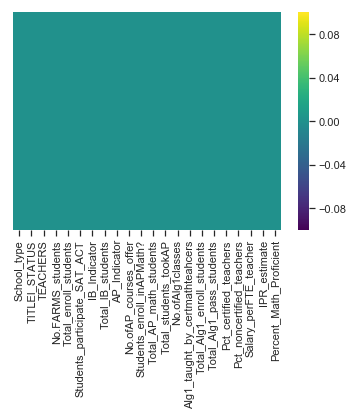

In [131]:
sns.heatmap(math_clean.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [132]:
math_clean.shape

(13799, 22)

### 3. Looking for Correlations and Visualizing
We should calculate data correlations and plot a scatter matrix.

For training the ML models, we'll want to separate the Percent_Math_Proficient from the rest of the data. But for investigating correlations, we'll want to include the target.

In [133]:
math_clean=math_clean[['School_type', 'TITLEI_STATUS', 'TEACHERS', 'No.FARMS_students',
       'Total_enroll_students', 'Students_participate_SAT_ACT', 'IB_Indicator',
       'Total_IB_students', 'AP_Indicator', 'No.ofAP_courses_offer',
       'Students_enroll_inAPMath?', 'Total_AP_math_students','Total_students_tookAP', 
       'No.ofAlg1classes','Alg1_taught_by_certmathteahcers', 'Total_Alg1_enroll_students','Total_Alg1_pass_students',
       'Pct_certified_teachers', 'Pct_noncertified_teachers',
       'Salary_perFTE_teacher', 'IPR_estimate','Percent_Math_Proficient']]

In [134]:
correlation_matrix = math_clean.corr()

In [135]:
correlation_matrix['Percent_Math_Proficient'].sort_values(ascending=False)

Percent_Math_Proficient            1.000000
IPR_estimate                       0.332693
Total_students_tookAP              0.217590
Total_AP_math_students             0.197938
No.ofAP_courses_offer              0.180160
Salary_perFTE_teacher              0.152712
Students_participate_SAT_ACT       0.151022
TEACHERS                           0.138824
Students_enroll_inAPMath?          0.115152
AP_Indicator                       0.106451
Total_enroll_students              0.098206
Pct_certified_teachers             0.092077
Alg1_taught_by_certmathteahcers    0.049062
Total_Alg1_pass_students           0.039126
IB_Indicator                       0.012094
Total_IB_students                  0.002052
Total_Alg1_enroll_students        -0.008082
No.ofAlg1classes                  -0.011535
Pct_noncertified_teachers         -0.093537
No.FARMS_students                 -0.142292
School_type                       -0.144461
Name: Percent_Math_Proficient, dtype: float64

It seems like a few features (IPR_estimate, Total_students_tookAP, Total_AP_math_students have a weak to moderate positive correlation to the target (Percent_Math_Proficient), and a couple are somewhat negatively correlated (School_type).

IPR_estimate is the Neighborhood Income Poverty Ratio.
Total_students_tookAP is the count of students who the AP exam.
Total_AP_math_students is the number of students who took an AP math course.
School_type is refers to whether the school is a "1-Regular School, 2-Special Education School, 3-Career and Technical School and 4-Alternative Education School"

We can look at a heatmap of the correlations of all numeric features to visualize which features are correlated.

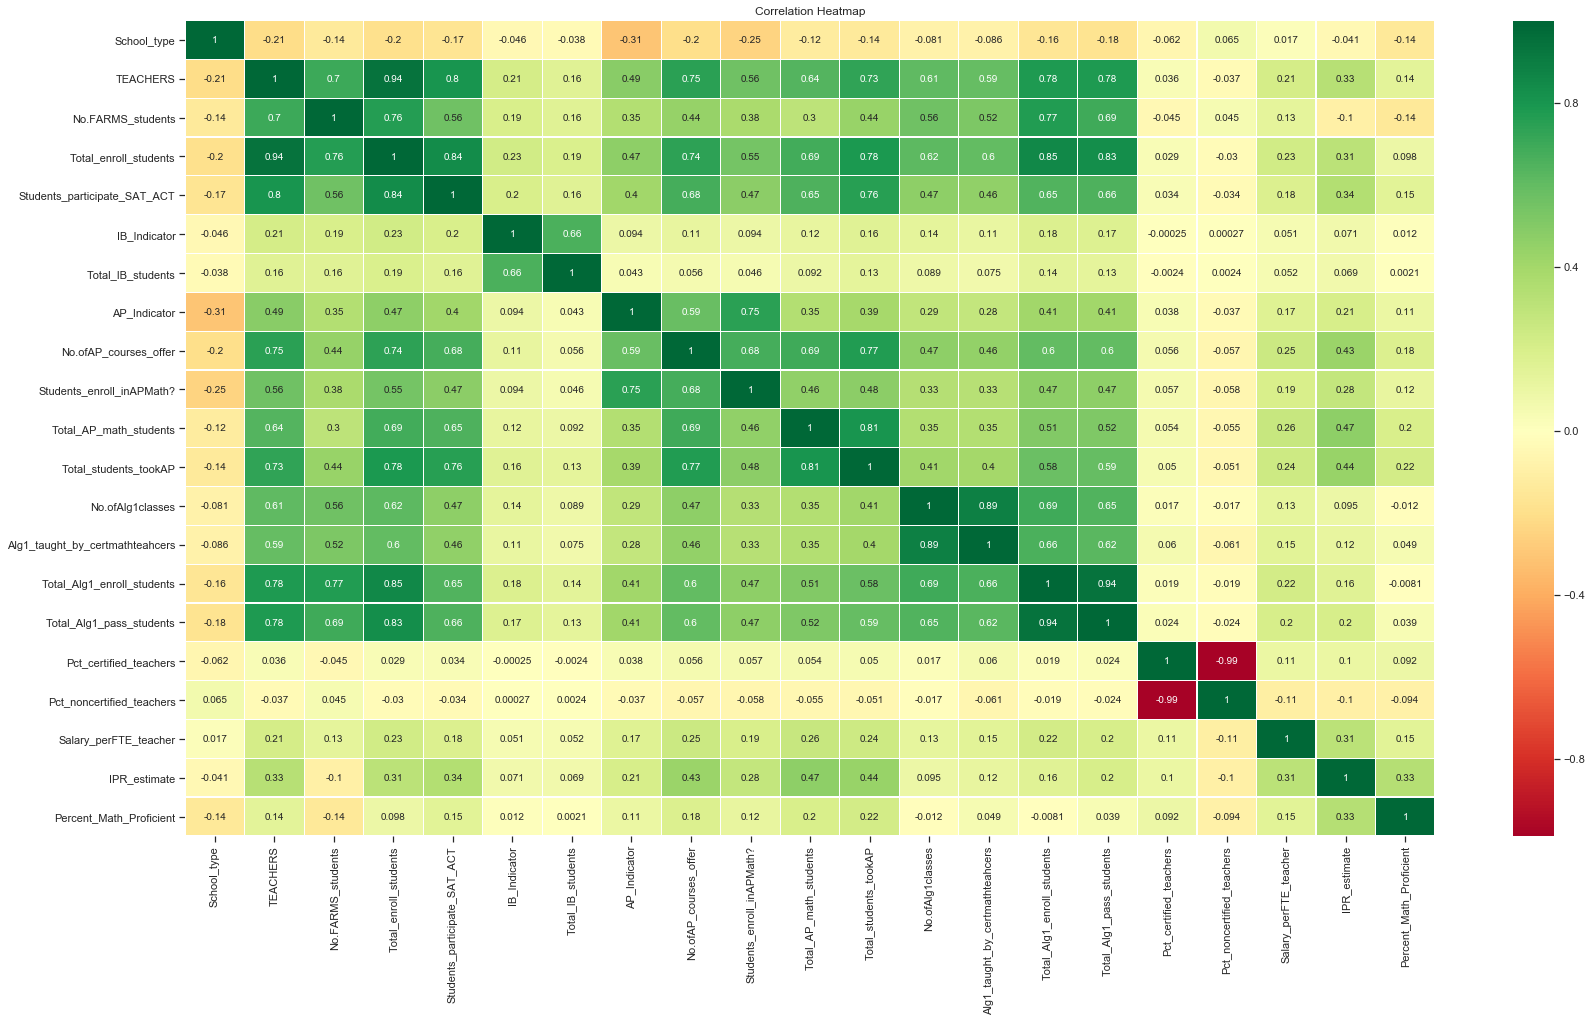

In [136]:
# correlation matrix heatmap
plt.figure(figsize=(28,15))
corr_heatmap = sns.heatmap(correlation_matrix, annot=True, linewidths=0.2, center=0, cmap="RdYlGn")
corr_heatmap.set_title('Correlation Heatmap')
plt.savefig('/Users/dansa/Documents/corr_heatmap.png', dpi=300, bbox_inches='tight')

In [137]:
#test
corr_pairs = {}
feats = correlation_matrix.columns
for x in feats:
    for y in feats:
        if x != y and np.abs(correlation_matrix[x][y]) >= 0.7:  # which pairs are strongely correlated?
            if (y, x) not in corr_pairs.keys():
                corr_pairs[(x, y)] = correlation_matrix[x][y]

In [138]:
corr_pairs

{('TEACHERS', 'No.FARMS_students'): 0.7017086490804209,
 ('TEACHERS', 'Total_enroll_students'): 0.938406324099637,
 ('TEACHERS', 'Students_participate_SAT_ACT'): 0.8006030587787448,
 ('TEACHERS', 'No.ofAP_courses_offer'): 0.7502889280050299,
 ('TEACHERS', 'Total_students_tookAP'): 0.7337755312720665,
 ('TEACHERS', 'Total_Alg1_enroll_students'): 0.7791810513224016,
 ('TEACHERS', 'Total_Alg1_pass_students'): 0.7777312626768963,
 ('No.FARMS_students', 'Total_enroll_students'): 0.7626556465671063,
 ('No.FARMS_students', 'Total_Alg1_enroll_students'): 0.7677866551722557,
 ('Total_enroll_students', 'Students_participate_SAT_ACT'): 0.8386079499694518,
 ('Total_enroll_students', 'No.ofAP_courses_offer'): 0.7435334085186153,
 ('Total_enroll_students', 'Total_students_tookAP'): 0.7828564684209866,
 ('Total_enroll_students', 'Total_Alg1_enroll_students'): 0.8525157891758104,
 ('Total_enroll_students', 'Total_Alg1_pass_students'): 0.831934337567597,
 ('Students_participate_SAT_ACT', 'Total_student

In [139]:
weaker_label = []
for pair in corr_pairs:
    if np.abs(correlation_matrix[pair[0]]['Percent_Math_Proficient']) < np.abs(correlation_matrix[pair[1]]['Percent_Math_Proficient']):
        weaker_label.append(pair[0])
    else:
        weaker_label.append(pair[1])

In [140]:
poss_redundant_feats = set(weaker_label)
poss_redundant_feats

{'AP_Indicator',
 'No.ofAP_courses_offer',
 'No.ofAlg1classes',
 'Pct_certified_teachers',
 'Students_participate_SAT_ACT',
 'TEACHERS',
 'Total_AP_math_students',
 'Total_Alg1_enroll_students',
 'Total_Alg1_pass_students',
 'Total_enroll_students'}

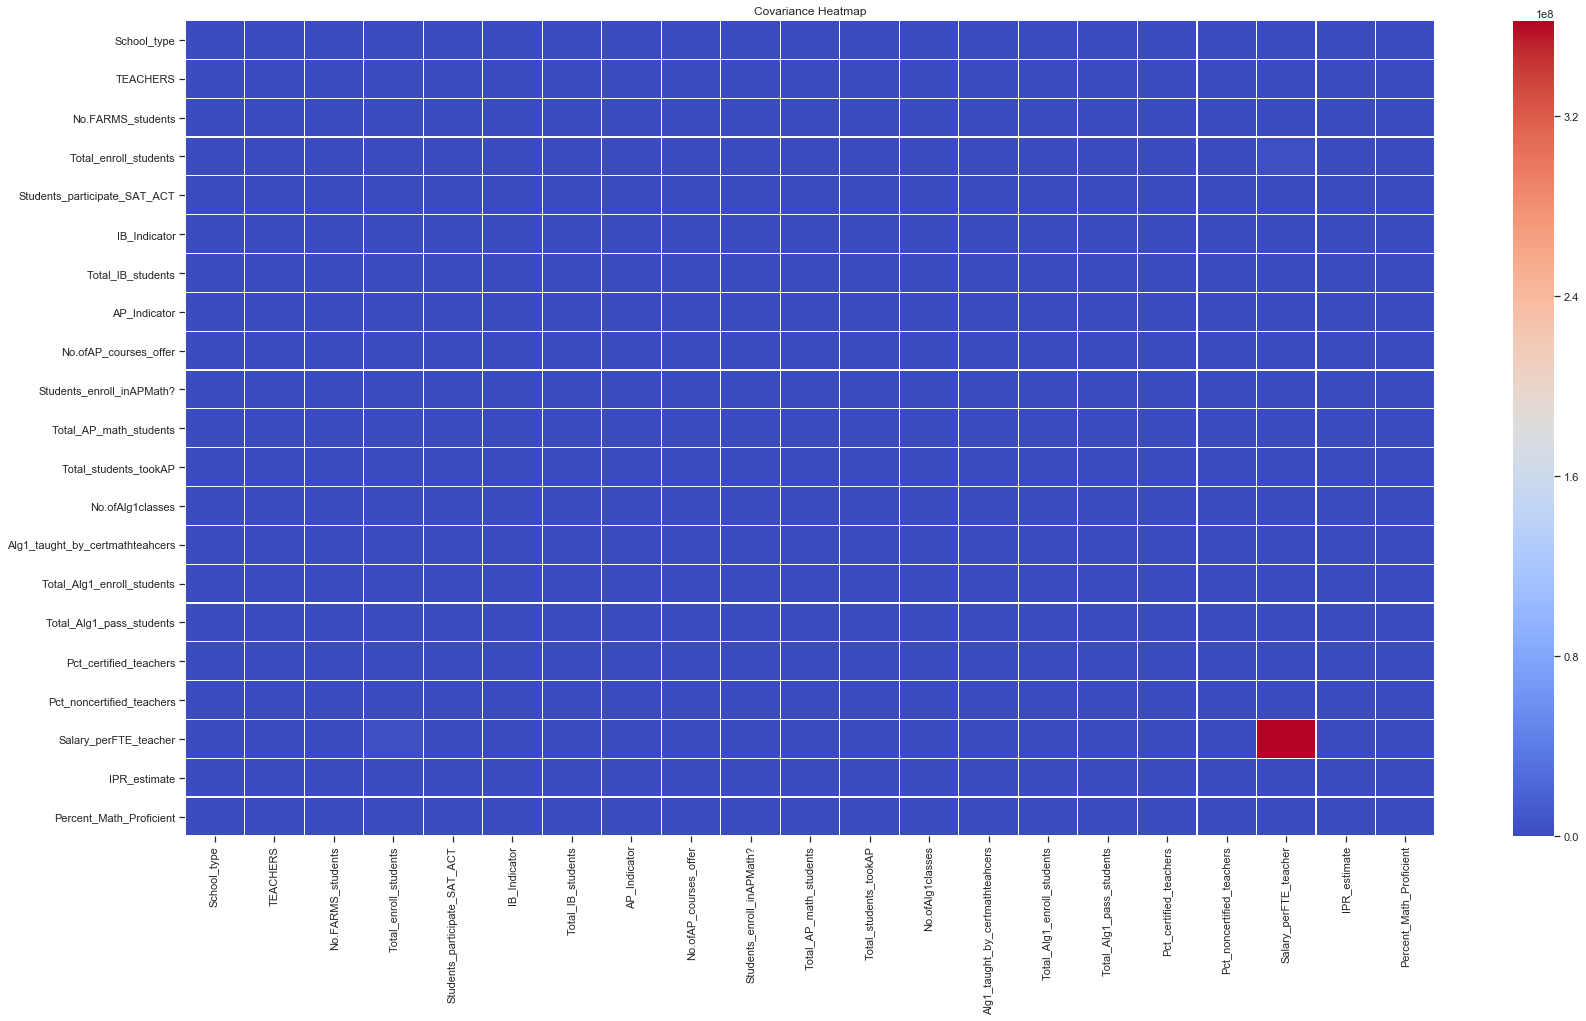

In [141]:
cov_matrix = math_clean.cov()
plt.figure(figsize=(28,15))
covar_heatmap = sns.heatmap(data=cov_matrix, cmap='coolwarm', linewidth=0.2) 
covar_heatmap.set_title('Covariance Heatmap')
plt.savefig('/Users/dansa/Documents/covar_heatmap.png', dpi=300, bbox_inches='tight')

In [142]:
attrs = ['IPR_estimate','Total_AP_math_students','Total_students_tookAP','Percent_Math_Proficient']

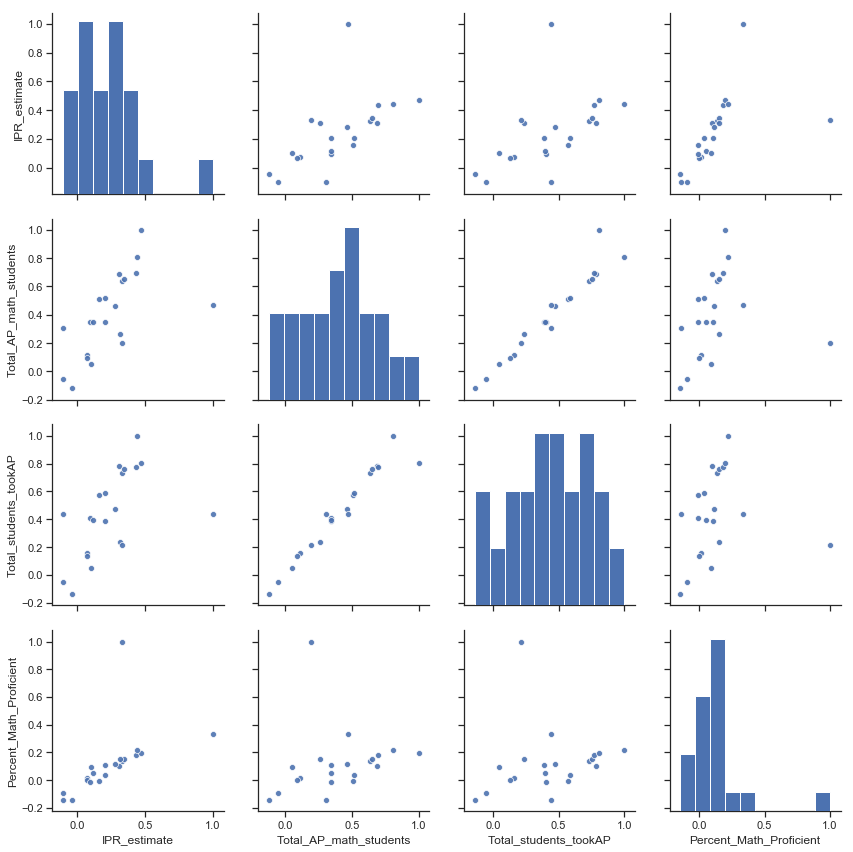

In [143]:
sns.set(style='ticks', color_codes=True)
_ = sns.pairplot(data=correlation_matrix[attrs], height=3, aspect=1, kind='scatter', plot_kws={'alpha':0.9})

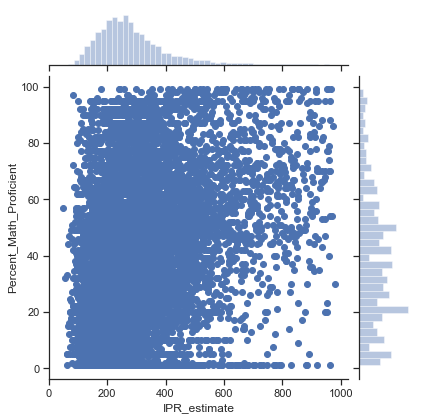

In [144]:
sns.jointplot(x="IPR_estimate", y="Percent_Math_Proficient", data=math_clean)

### ML prep
#### Separate labels
Let's separate out the target from the predicting features.

In [145]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(math_clean, test_size=0.2, random_state=0)

In [146]:
train.shape

(11039, 22)

In [147]:
test.shape

(2760, 22)

In [148]:
math_clean.shape

(13799, 22)

In [149]:
df_X_train = train.drop(['Percent_Math_Proficient'], axis=1)
df_y_train = train['Percent_Math_Proficient'].copy()

df_X_test = test.drop(['Percent_Math_Proficient'], axis=1)
df_y_test = test['Percent_Math_Proficient'].copy()

In [150]:
df_X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11039 entries, 12375 to 2732
Data columns (total 21 columns):
School_type                        11039 non-null float64
TITLEI_STATUS                      11039 non-null object
TEACHERS                           11039 non-null float64
No.FARMS_students                  11039 non-null float64
Total_enroll_students              11039 non-null float64
Students_participate_SAT_ACT       11039 non-null float64
IB_Indicator                       11039 non-null float64
Total_IB_students                  11039 non-null float64
AP_Indicator                       11039 non-null float64
No.ofAP_courses_offer              11039 non-null float64
Students_enroll_inAPMath?          11039 non-null float64
Total_AP_math_students             11039 non-null float64
Total_students_tookAP              11039 non-null float64
No.ofAlg1classes                   11039 non-null float64
Alg1_taught_by_certmathteahcers    11039 non-null float64
Total_Alg1_enroll_s

In [158]:
numerical_features = df_X_train.dtypes == 'float'
categorical_features = ~numerical_features

In [193]:
categorical_features

School_type                        False
TITLEI_STATUS                       True
TEACHERS                           False
No.FARMS_students                  False
Total_enroll_students              False
Students_participate_SAT_ACT       False
IB_Indicator                       False
Total_IB_students                  False
AP_Indicator                       False
No.ofAP_courses_offer              False
Students_enroll_inAPMath?          False
Total_AP_math_students             False
Total_students_tookAP              False
No.ofAlg1classes                   False
Alg1_taught_by_certmathteahcers    False
Total_Alg1_enroll_students         False
Total_Alg1_pass_students           False
Pct_certified_teachers             False
Pct_noncertified_teachers          False
Salary_perFTE_teacher              False
IPR_estimate                       False
dtype: bool

### Applying transformation using Standard Scaler and One-Hot Encoding

In [204]:
col_transformer = ColumnTransformer(
                    transformers=[
                        ('ss', StandardScaler(), numerical_features), # scaling numerical features
                        ('ohe', OneHotEncoder(), categorical_features) #Since these categorical features don't appear to have an inherent ordering, let's try encoding them as one-hot vectors for better ML performance.
                    ], remainder ='passthrough', n_jobs=-1)

In [215]:
#X_train_transformed = col_transformer.fit_transform(df_X_train)
#pd.DataFrame(X_train_transformed).head()

### Random Forest Regressor

In [237]:
pipe1 = Pipeline(steps =[
    ("preprocessing", col_transformer),
    ('model1', RandomForestRegressor(n_estimators = 200))
# or LinearRegression, SVR, DecisionTreeRegressor, etc
])

In [238]:
cvs = cross_val_score(pipe1, df_X_train, df_y_train, cv = 5)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [0.37986635 0.36065489 0.35451649 0.35207117 0.37886634]
Mean of all scores:  0.3651950500868626


In [239]:
pipe1.fit(df_X_train, df_y_train)

Pipeline(memory=None,
     steps=[('preprocessing', ColumnTransformer(n_jobs=-1, remainder='passthrough', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True), School_type                         True
TITLEI_STATUS                      ...tors=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False))])

In [240]:
pred1 = pipe1.predict(df_X_test)

In [241]:
print("Mean squared error: %.2f"% mean_squared_error(df_y_test, pred1))
print("Mean absolute error: %.2f"% mean_absolute_error(df_y_test, pred1))
print('Root Mean Squared Error:%.2f'% np.sqrt(mean_squared_error( df_y_test, pred1)))
print("r2 score: %.2f"% r2_score(df_y_test, pred1))

Mean squared error: 360.90
Mean absolute error: 14.91
Root Mean Squared Error:19.00
r2 score: 0.36


In [223]:
#pd.DataFrame({'original test set':df_y_test, 'predictions': preds})

### Linear Regression

In [218]:
lr = LinearRegression()
pipe2 = pipe1 = Pipeline(steps =[
    ("preprocessing", col_transformer),
    ('model1', lr)
# or LinearRegression, SVR, DecisionTreeRegressor, etc
])

In [219]:
cvs = cross_val_score(pipe2, df_X_train, df_y_train, cv = 5)
print("All cross val scores:", cvs)
print("Mean of all scores: ", cvs.mean())

All cross val scores: [0.21493955 0.21043513 0.21304802 0.20291396 0.2348163 ]
Mean of all scores:  0.215230592636643


In [220]:
pipe2.fit(df_X_train, df_y_train)

Pipeline(memory=None,
     steps=[('preprocessing', ColumnTransformer(n_jobs=-1, remainder='passthrough', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True), School_type                         True
TITLEI_STATUS                      ...'model1', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [228]:
pred2 = pipe2.predict(df_X_test)

In [229]:
print("Mean squared error: %.2f"% mean_squared_error(df_y_test, pred2))
print("Mean absolute error: %.2f"% mean_absolute_error(df_y_test, pred2))
print('Root Mean Squared Error:%.2f'% np.sqrt(mean_squared_error( df_y_test, pred2)))
print("r2 score: %.2f"% r2_score(df_y_test, pred2))

Mean squared error: 453.90
Mean absolute error: 17.06
Root Mean Squared Error:21.31
r2 score: 0.19


In [224]:
#pd.DataFrame({'original test set':df_y_test, 'predictions': preds2})

In [ ]:
from collections import OrderedDict
# Create a dictionary to store the train and test scores, best alpha values
scores = {'Index': ['RFR','Linear Reg'],
         'RMSE': [30352.931, 21.31],
         'R2': [0.936, 0.19]}
scores = OrderedDict(scores)

# Create a dataframe from the dictionary
reg_models_scores = pd.DataFrame.from_dict(scores)
reg_models_scores

### Previously run ML models

Mean squared error: 454.07
Mean absolute error: 17.06
Root Mean Squared Error:21.31
r2 score: 0.19


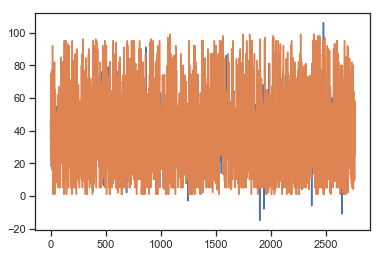

In [225]:
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
regr = linear_model.LinearRegression()
regr.fit(train_data_std, df_y_train)
y_pred = np.round(regr.predict(test_data_std))
meansqr=[]
meanabs=[]
r2=[]
rmse=[]
meansqr.append(mean_squared_error(df_y_test, y_pred))
meanabs.append(abs(df_y_test-y_pred).mean())
rmse.append(np.sqrt(mean_squared_error(df_y_test, y_pred)))
r2.append(r2_score(df_y_test, y_pred))
print("Mean squared error: %.2f"% mean_squared_error(df_y_test, y_pred))
print("Mean absolute error: %.2f"% mean_absolute_error(df_y_test, y_pred))
print('Root Mean Squared Error:%.2f'% np.sqrt(mean_squared_error( df_y_test, y_pred)))
print("r2 score: %.2f"% r2_score(df_y_test, y_pred))
#plotting y_pred and y_test
t = np.arange(0,len(y_pred) , 1)
plt.plot(t,y_pred,t,df_y_test)

Mean squared error: 358.33
Mean absolute error: 14.86
Root Mean Squared Error:18.93
r2 score: 0.36


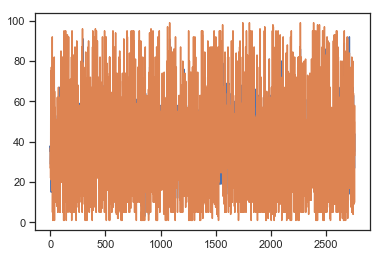

In [220]:
# RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_data_std, df_y_train);
y_pred =np.round(rf.predict(test_data_std))
meansqr.append(mean_squared_error(df_y_test, y_pred))
meanabs.append(abs(df_y_test-y_pred).mean())
rmse.append(np.sqrt(mean_squared_error(df_y_test, y_pred)))
r2.append(r2_score(df_y_test, y_pred))
print("Mean squared error: %.2f"% mean_squared_error(df_y_test, y_pred))
print("Mean absolute error: %.2f"% mean_absolute_error(df_y_test, y_pred))
print('Root Mean Squared Error:%.2f'% np.sqrt(mean_squared_error( df_y_test, y_pred)))
print("r2 score: %.2f"% r2_score(df_y_test, y_pred))
#plotting y_pred and y_test
t = np.arange(0,len(y_pred) , 1)
plt.plot(t,y_pred,t,df_y_test)

Mean squared error: 426.14
Mean absolute error: 16.01
Root Mean Squared Error:20.64
r2 score: 0.24


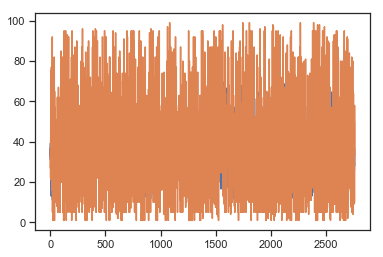

In [221]:
#svm regressor
from sklearn.svm import SVR
regressor=SVR(kernel="rbf",epsilon=1.0,degree=3)
regressor.fit(train_data_std, df_y_train)
y_pred=regressor.predict(test_data_std)
meansqr.append(mean_squared_error(df_y_test, y_pred))
meanabs.append(abs(df_y_test-y_pred).mean())
rmse.append(np.sqrt(mean_squared_error(df_y_test, y_pred)))
r2.append(r2_score(df_y_test, y_pred))
print("Mean squared error: %.2f"% mean_squared_error(df_y_test, y_pred))
print("Mean absolute error: %.2f"% mean_absolute_error(df_y_test, y_pred))
print('Root Mean Squared Error:%.2f'% np.sqrt(mean_squared_error( df_y_test, y_pred)))
print("r2 score: %.2f"% r2_score(df_y_test, y_pred))
#plotting y_pred and y_test
t = np.arange(0,len(y_pred) , 1)
plt.plot(t,y_pred,t,df_y_test)

Mean squared error: 452.73
Mean absolute error: 16.44
Root Mean Squared Error:21.28
r2 score: 0.19


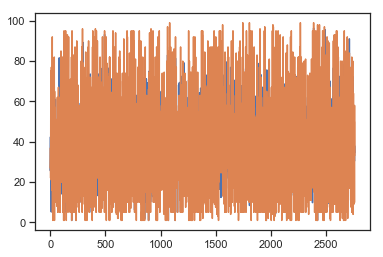

In [222]:
#knearest neighbhors
from sklearn import neighbors
n_neighbors=5
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(train_data_std, df_y_train)
y_pred=knn.predict(test_data_std)
meansqr.append(mean_squared_error(df_y_test, y_pred))
meanabs.append(abs(df_y_test-y_pred).mean())
rmse.append(np.sqrt(mean_squared_error(df_y_test, y_pred)))
r2.append(r2_score(df_y_test, y_pred))
print("Mean squared error: %.2f"% mean_squared_error(df_y_test, y_pred))
print("Mean absolute error: %.2f"% mean_absolute_error(df_y_test, y_pred))
print('Root Mean Squared Error:%.2f'% np.sqrt(mean_squared_error( df_y_test, y_pred)))
print("r2 score: %.2f"% r2_score(df_y_test, y_pred))
#plotting y_pred and y_test
t = np.arange(0,len(y_pred) , 1)
plt.plot(t,y_pred,t,df_y_test)

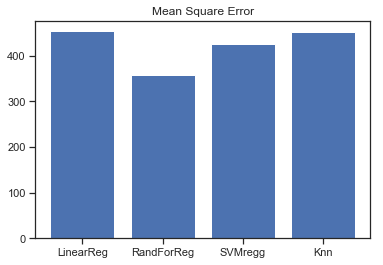

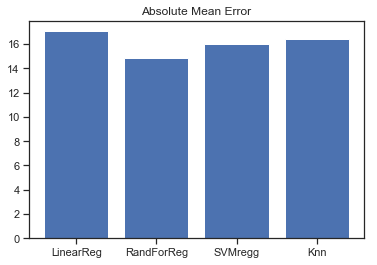

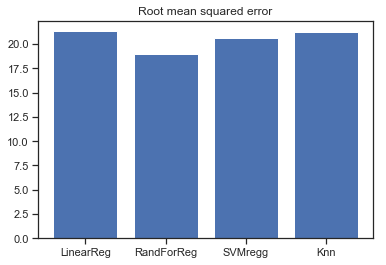

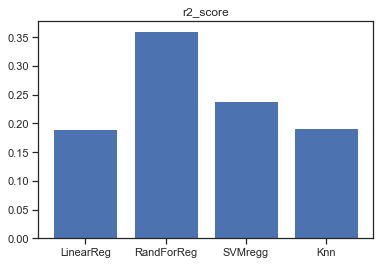

In [223]:
objects=('LinearReg','RandForReg','SVMregg','Knn')
plt.bar(np.arange(len(meansqr)),meansqr)
plt.xticks(np.arange(len(meansqr)), objects)
plt.title('Mean Square Error')
plt.show()
plt.bar(np.arange(len(meanabs)),meanabs)
plt.xticks(np.arange(len(meanabs)), objects)
plt.title('Absolute Mean Error')
plt.show()
plt.bar(np.arange(len(rmse)),rmse)
plt.xticks(np.arange(len(rmse)), objects)
plt.title('Root mean squared error')
plt.show()
plt.bar(np.arange(len(r2)),r2)
plt.xticks(np.arange(len(r2)), objects)
plt.title('r2_score')
plt.show()

R_2 score or R squared coefficient is a statistical measure of how well the data is fit to the regression lines. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a 0 – 100% scale.
If the r_2 score is 0 that implies a bad model and r_2 is equal to 1 for an ideal model. 

Among the models the best r2_score is around 0.36 with random forest regression model which implies 36% of the variance in proficiency scores for math was accounted for by the variables

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far the data points are from the line and is a measure of how spread out these residuals are.


In [242]:
from collections import OrderedDict
# Create a dictionary to store the train and test scores, best alpha values
scores = {'Index': ['LinearReg','RandForReg','SVMregg','Knn'],
         'RMSE': [21.31, 18.93, 20.64, 21.28],
         'R2': [0.19, 0.36, 0.24, 0.19]}
scores = OrderedDict(scores)

# Create a dataframe from the dictionary
reg_models_scores = pd.DataFrame.from_dict(scores)
reg_models_scores

,Index,RMSE,R2
0,LinearReg,21.31,0.19
1,RandForReg,18.93,0.36
2,SVMregg,20.64,0.24
3,Knn,21.28,0.19


Firstly I used linear regresion to predict but we know that it cannot learn some complex features for better prediction.
Randomn forest regressor uses more computation than other techniques and also performs better than other techniques.
SVM is known for its performance on smaller datasets and also robust to deviations but svm is used for classification tasks widely.
KNN is widely used for classification task. It is known for it's simple and computationally effective algorithm and performs good in case of classification tasks but not in case of regression tasks.
We got mean squares error of around 2 .2 and absolute mean error less than 1 )and also r2_score of around 0.85 with ranndomnforest regressor doing the best. These models differ by very less margins in the error scores I think the margin would be more if we could get more data and also errors would be less with more data.